In [1]:
from SyMBac.phase_contrast_drawing import run_simulation, get_trench_segments
from SyMBac.general_drawing import generate_curve_props, gen_cell_props_for_draw, get_space_size, convolve_rescale

/home/georgeos/miniconda3/envs/symbac/lib/python3.9/site-packages/SyMBac/general_drawing.py:18: UserWarning: Could not load CuPy for SyMBac, are you using a GPU? Defaulting to CPU convolution.
  warnings.warn("Could not load CuPy for SyMBac, are you using a GPU? Defaulting to CPU convolution.")


In [2]:
resize_amount = 3
pix_mic_conv = 0.0655 ##0.108379937 micron/pix for 60x, 0.0655 for 100x
scale = pix_mic_conv / resize_amount 
sim_length = 100

In [3]:
cell_timeseries, space = run_simulation(
    trench_length=15, 
    trench_width=1.5, 
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = sim_length,
    pix_mic_conv = pix_mic_conv,
    gravity=0,
    phys_iters=20,
    max_length_var = 3,
    width_var = 0.3,
    save_dir="/tmp/"
) # growth phase

In [4]:
cell_timeseries[0][0].daughter

In [5]:
cell_timeseries[1]

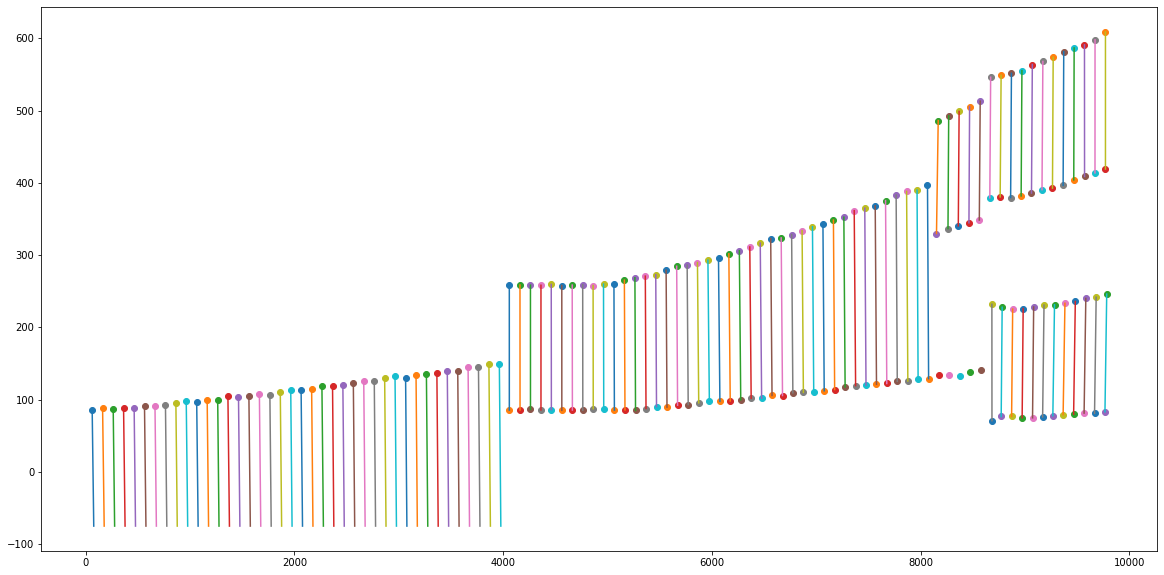

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for t, time in enumerate(cell_timeseries):
    for cell in time:
        if cell.daughter:
            x_pos, y_pos = cell.get_centroid()
            d_x_pos, d_y_pos = cell.daughter.get_centroid()
            plt.plot([x_pos+t*100, d_x_pos+t*100], [y_pos, d_y_pos])
        x_pos, y_pos = cell.get_centroid()
        plt.scatter(x_pos+t*100, y_pos)

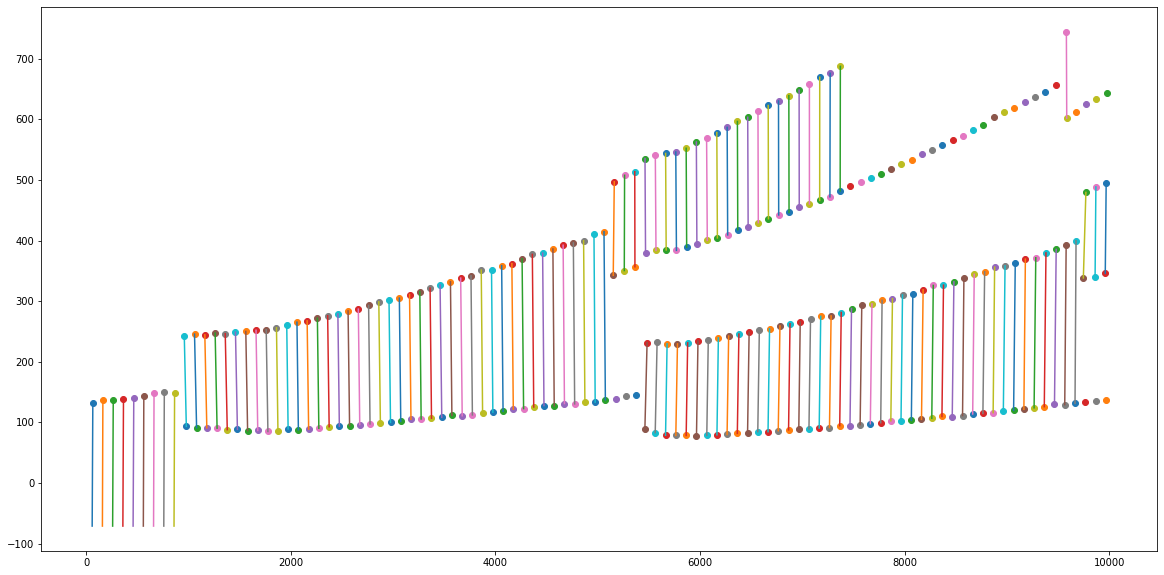

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for t, timepoint in enumerate(cell_timeseries):
    for c, cell in enumerate(timepoint):
        if cell.daughter:
            x_pos, y_pos = cell.get_centroid()
            d_x_pos, d_y_pos = cell.daughter.get_centroid()
            plt.plot([x_pos+t*100, d_x_pos+t*100], [y_pos, d_y_pos])
        x_pos, y_pos = cell.get_centroid()
        plt.scatter(x_pos+t*100, y_pos)

In [4]:
main_segments = get_trench_segments(space)
ID_props = generate_curve_props(cell_timeseries)

In [5]:

from joblib import Parallel, delayed
from tqdm.notebook import tqdm

cell_timeseries_properties = Parallel(n_jobs=-1)(
    delayed(gen_cell_props_for_draw)(a, ID_props) for a in tqdm(cell_timeseries, desc='Timeseries Properties'))

do_transformation = True
offset = 30
label_masks = True
space_size = get_space_size(cell_timeseries_properties)
scenes = Parallel(n_jobs=13)(delayed(draw_scene)(
    cell_properties, do_transformation, space_size, offset, label_masks) for cell_properties in tqdm(cell_timeseries_properties, desc='Scene Draw:'))

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

/home/georgeos/miniconda3/envs/symbac/lib/python3.9/site-packages/SyMBac/general_drawing.py:18: UserWarning: Could not load CuPy for SyMBac, are you using a GPU? Defaulting to CPU convolution.
  warnings.warn("Could not load CuPy for SyMBac, are you using a GPU? Defaulting to CPU convolution.")
/home/georgeos/miniconda3/envs/symbac/lib/python3.9/site-packages/SyMBac/general_drawing.py:18: UserWarning: Could not load CuPy for SyMBac, are you using a GPU? Defaulting to CPU convolution.
  warnings.warn("Could not load CuPy for SyMBac, are you using a GPU? Defaulting to CPU convolution.")
/home/georgeos/miniconda3/envs/symbac/lib/python3.9/site-packages/SyMBac/general_drawing.py:18: UserWarning: Could not load CuPy for SyMBac, are you using a GPU? Defaulting to CPU convolution.
  warnings.warn("Could not load CuPy for SyMBac, are you using a GPU? Defaulting to CPU convolution.")
/home/georgeos/miniconda3/envs/symbac/lib/python3.9/site-packages/SyMBac/general_drawing.py:18: UserWarning: Cou

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

NameError: name 'draw_scene' is not defined

In [16]:
cell_timeseries_properties

[[[223.81874164103203,
   46.72834002788455,
   5.112951319309161,
   array([ 71.04394002, 691.64760682]),
   0.9478305197588753,
   0.9977088627781016,
   0.06722785698445688,
   20],
  [210.0484775236967,
   48.79855110072663,
   6.98799876815589,
   array([ 69.63745399, 285.18745656]),
   0.9577389440298205,
   0.9127044542856538,
   0.007282734483482267,
   20],
  [185.1699913486214,
   44.15557376205939,
   5.489814193130002,
   array([63.90982784, 93.40261849]),
   1.0661718842122954,
   0.9031852590229659,
   -0.9708975623122886,
   20],
  [203.93649856237764,
   46.87318433147998,
   8.07223092705621,
   array([ 69.12037476, 483.40314854]),
   1.0819905229537503,
   0.9871559849726338,
   -0.5956671375410685,
   20]],
 [[213.32898899036098,
   48.79855110072663,
   6.072659585651863,
   array([ 69.3320863 , 291.13373006]),
   0.9577389440298205,
   0.9127044542856538,
   0.007282734483482267,
   20],
  [188.4758474442039,
   44.15557376205939,
   4.22799830572842,
   array([64.

In [23]:
from SyMBac.phase_contrast_drawing import  draw_scene

do_transformation = True
offset = 10
label_masks = True
space_size = get_space_size(cell_timeseries_properties)
scenes = Parallel(n_jobs=13)(delayed(draw_scene)(
    cell_properties, do_transformation, space_size, offset, label_masks) for cell_properties in tqdm(cell_timeseries_properties, desc='Scene Draw:'))

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

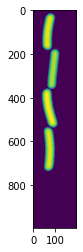

In [24]:
import matplotlib.pyplot as plt
plt.imshow(scenes[-1][0])

In [25]:
from joblib import Parallel, delayed
from matplotlib import pyplot as plt


from SyMBac.PSF import get_phase_contrast_kernel, get_condensers
from SyMBac.misc import get_sample_images
from SyMBac.general_drawing import generate_curve_props, gen_cell_props_for_draw, get_space_size, convolve_rescale, \
    make_images_same_shape

import napari

import numpy as np
from ipywidgets import interactive, fixed
from tqdm.notebook import tqdm

import importlib

from SyMBac.phase_contrast_drawing import run_simulation, get_trench_segments, draw_scene, generate_PC_OPL, \
    generate_test_comparison, generate_training_data

if importlib.util.find_spec("cupy") is None:
    manual_update = True
else:
    manual_update = False

(256, 46)


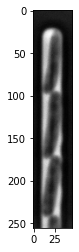

/home/georgeos/miniconda3/envs/symbac/lib/python3.9/site-packages/SyMBac/PSF.py:88: RuntimeWarning: invalid value encountered in divide
  kernel1 = 2*jv(1,rr)/(rr)
/home/georgeos/miniconda3/envs/symbac/lib/python3.9/site-packages/SyMBac/PSF.py:91: RuntimeWarning: invalid value encountered in divide
  kernel2 = 2*(R-W)**2/R**2 * jv(1,(R-W)**2/R**2 * rr)/rr


In [26]:
# plt.imshow(temp_expanded_scene)


condensers = get_condensers()
W, R, diameter = condensers["Ph3"]
radius=50
#F = 5
λ = 0.75
resize_amount = 3
pix_mic_conv = 0.0655 ##0.108379937 micron/pix for 60x, 0.0655 for 100x
scale = pix_mic_conv / resize_amount 
min_sigma = 0.42*0.6/6 / scale # micron#
sigma=min_sigma
NA=1.45
n = 1.4
kernel_params = (R,W,radius,scale,NA,n,sigma,λ)

#kernel_params = (R,W,radius,scale,F,sigma,λ)
real_image = get_sample_images()["E. coli 100x"]
print(real_image.shape)
plt.imshow(real_image,cmap="Greys_r")
plt.show()

media_multiplier=30
cell_multiplier=1
device_multiplier=-50
y_border_expansion_coefficient = 2
x_border_expansion_coefficient = 2



temp_expanded_scene, temp_expanded_scene_no_cells, temp_expanded_mask = generate_PC_OPL(
   main_segments=main_segments,
    offset=offset,
    scene = scenes[0][0],
    mask = scenes[0][1],
    media_multiplier=media_multiplier,
    cell_multiplier=cell_multiplier,
    device_multiplier=cell_multiplier,
    y_border_expansion_coefficient = y_border_expansion_coefficient,
    x_border_expansion_coefficient = x_border_expansion_coefficient,
    fluorescence=False,
    defocus=30
)



### Generate temporary image to make same shape
temp_kernel = get_phase_contrast_kernel(*kernel_params)
convolved = convolve_rescale(temp_expanded_scene, temp_kernel, 1/resize_amount, rescale_int = True)
real_resize, expanded_resized = make_images_same_shape(real_image,convolved, rescale_int=True)

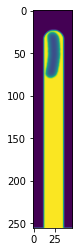

In [27]:
plt.imshow(expanded_resized)